In [1]:
from utils import *
from plots import *
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
PVALUE = 0.05
DATA_PATH = '../data/llm_dark_patterns_claude_3_5_sonnet.csv'
MODEL_NAME = "Claude_3_5_Sonnet"

### 1. Load data

In [3]:
df = pd.read_csv(DATA_PATH, decimal=',')

In [4]:
text_feature_cols = list(df.columns[24:])
female_df, male_df = prepare_dfs(df, text_feature_cols)

In [5]:
len(text_feature_cols)

86

### 2. Perform Wilcoxon test

In [6]:
wilcoxon_pvalues = compute_wilcoxon_pvalues(female_df, male_df, text_feature_cols, MODEL_NAME)

# categorize
wilcoxon_pvalues_0_05 = {feature: pvalue for feature, pvalue in wilcoxon_pvalues.items() if pvalue < PVALUE}
wilcoxon_pvalues_0_95 = {feature: pvalue for feature, pvalue in wilcoxon_pvalues.items() if pvalue >= PVALUE}

### 3. Distribution plots

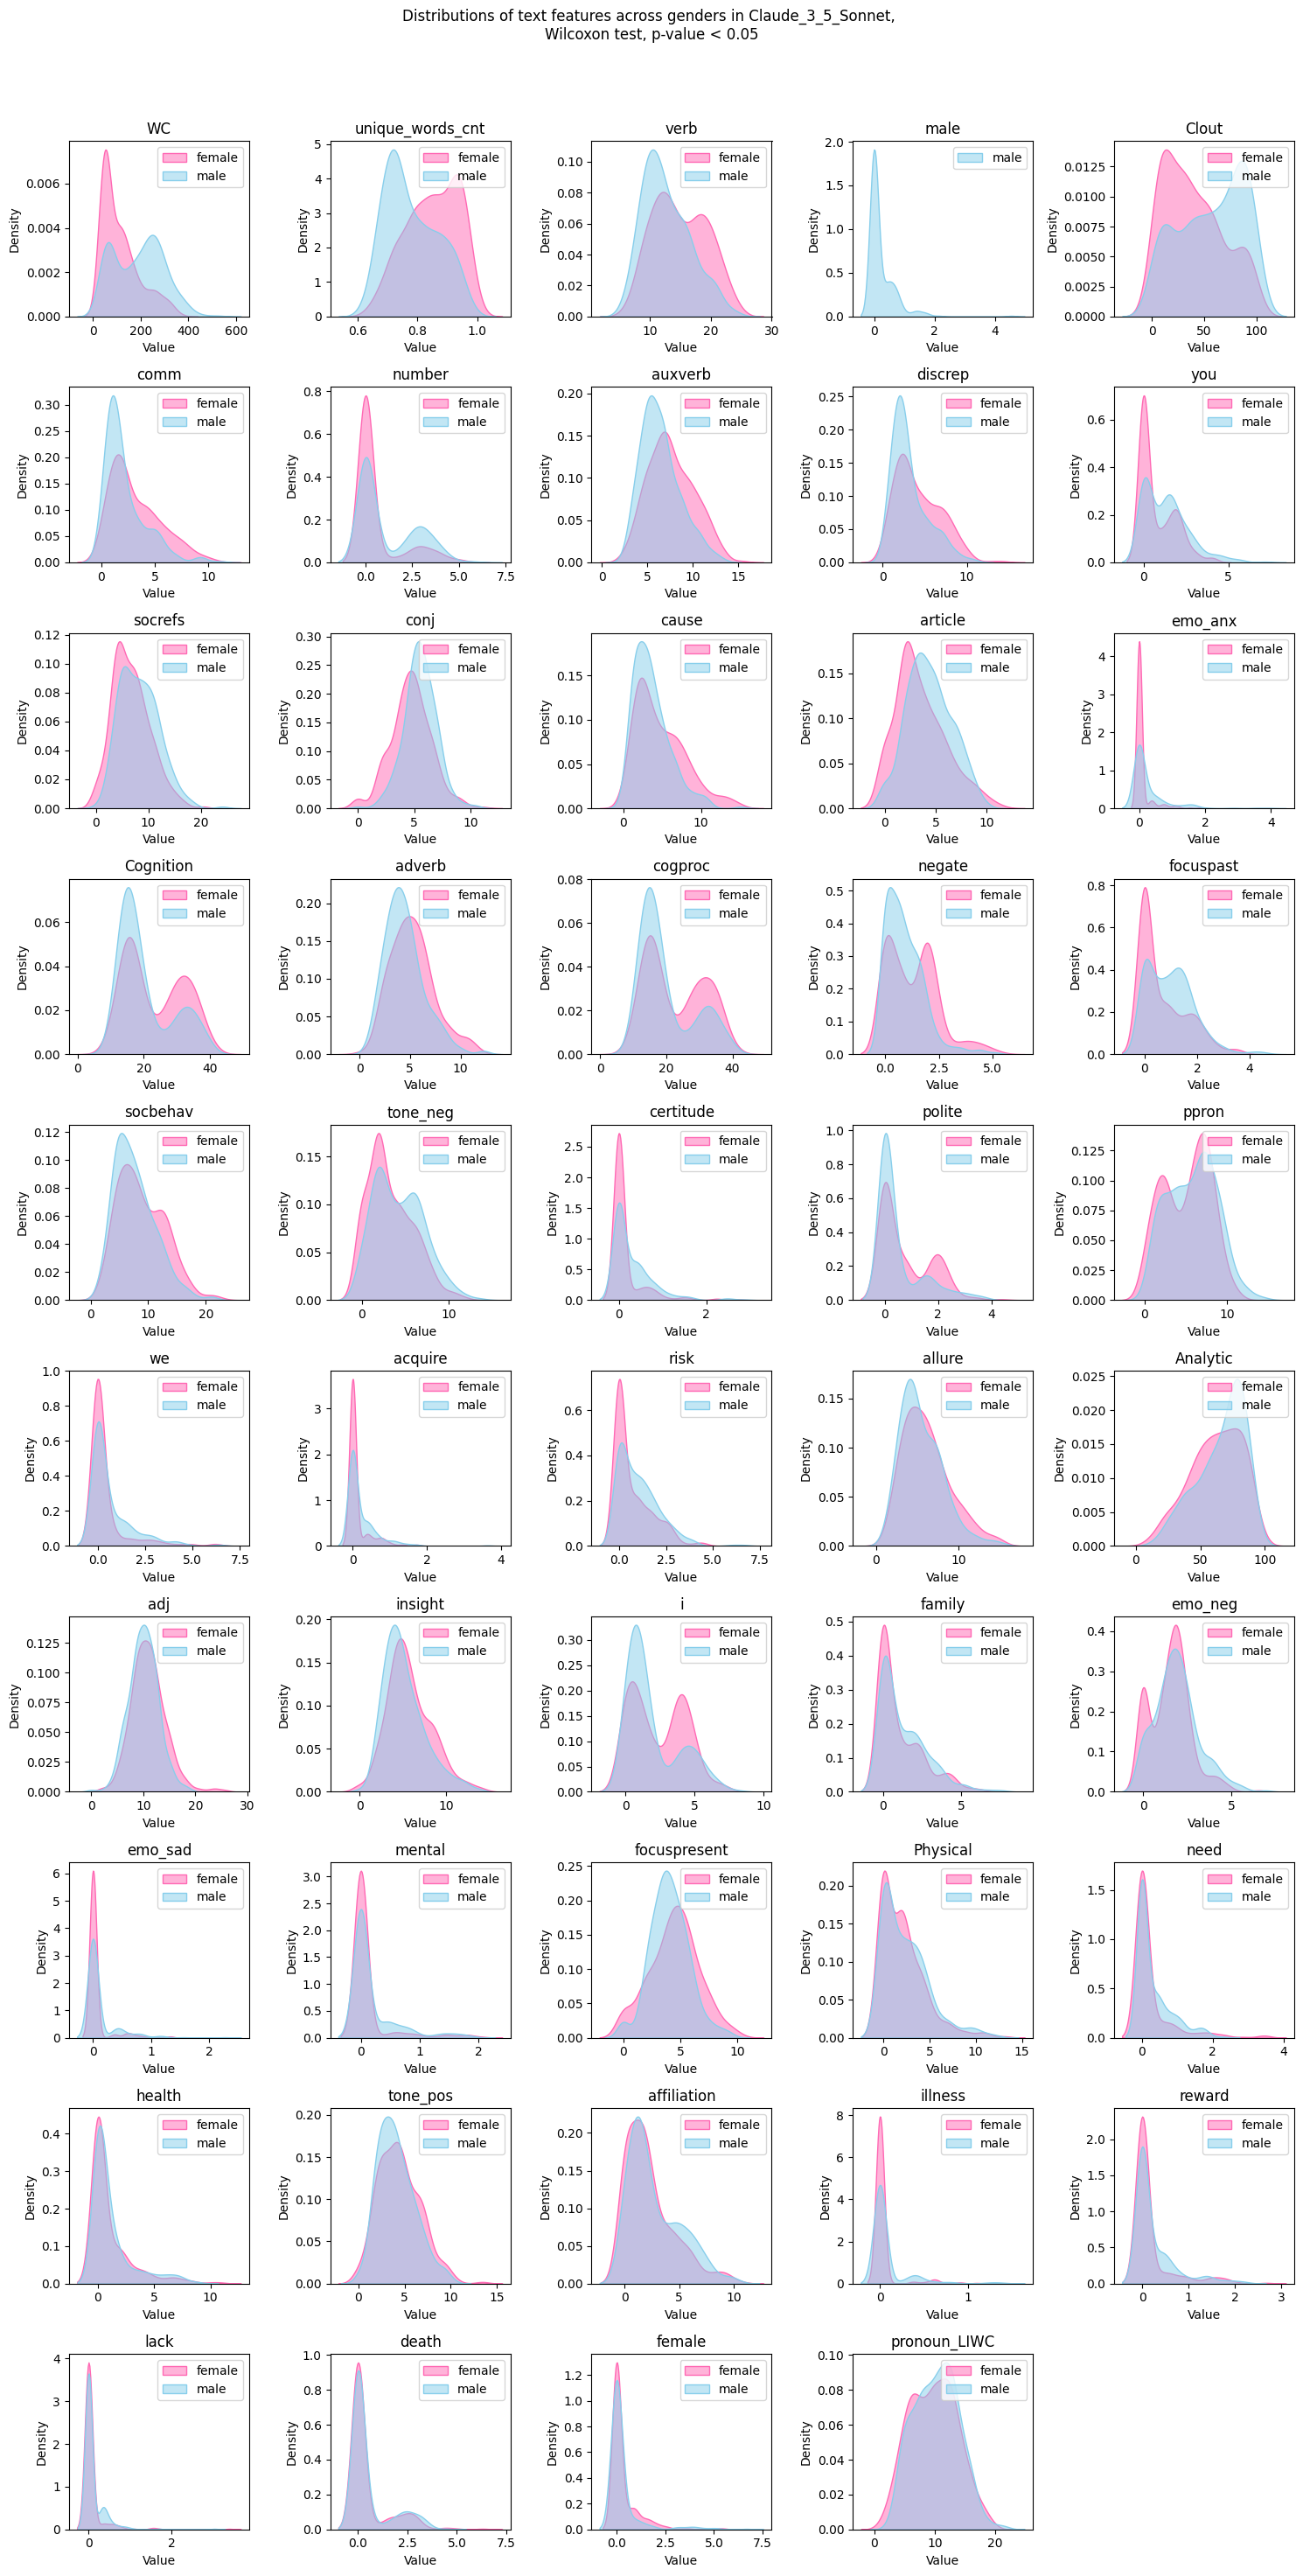

In [7]:
plot_features_distribution(male_df, female_df, wilcoxon_pvalues_0_05, PVALUE, MODEL_NAME)

### 4. Plot Cohen's d

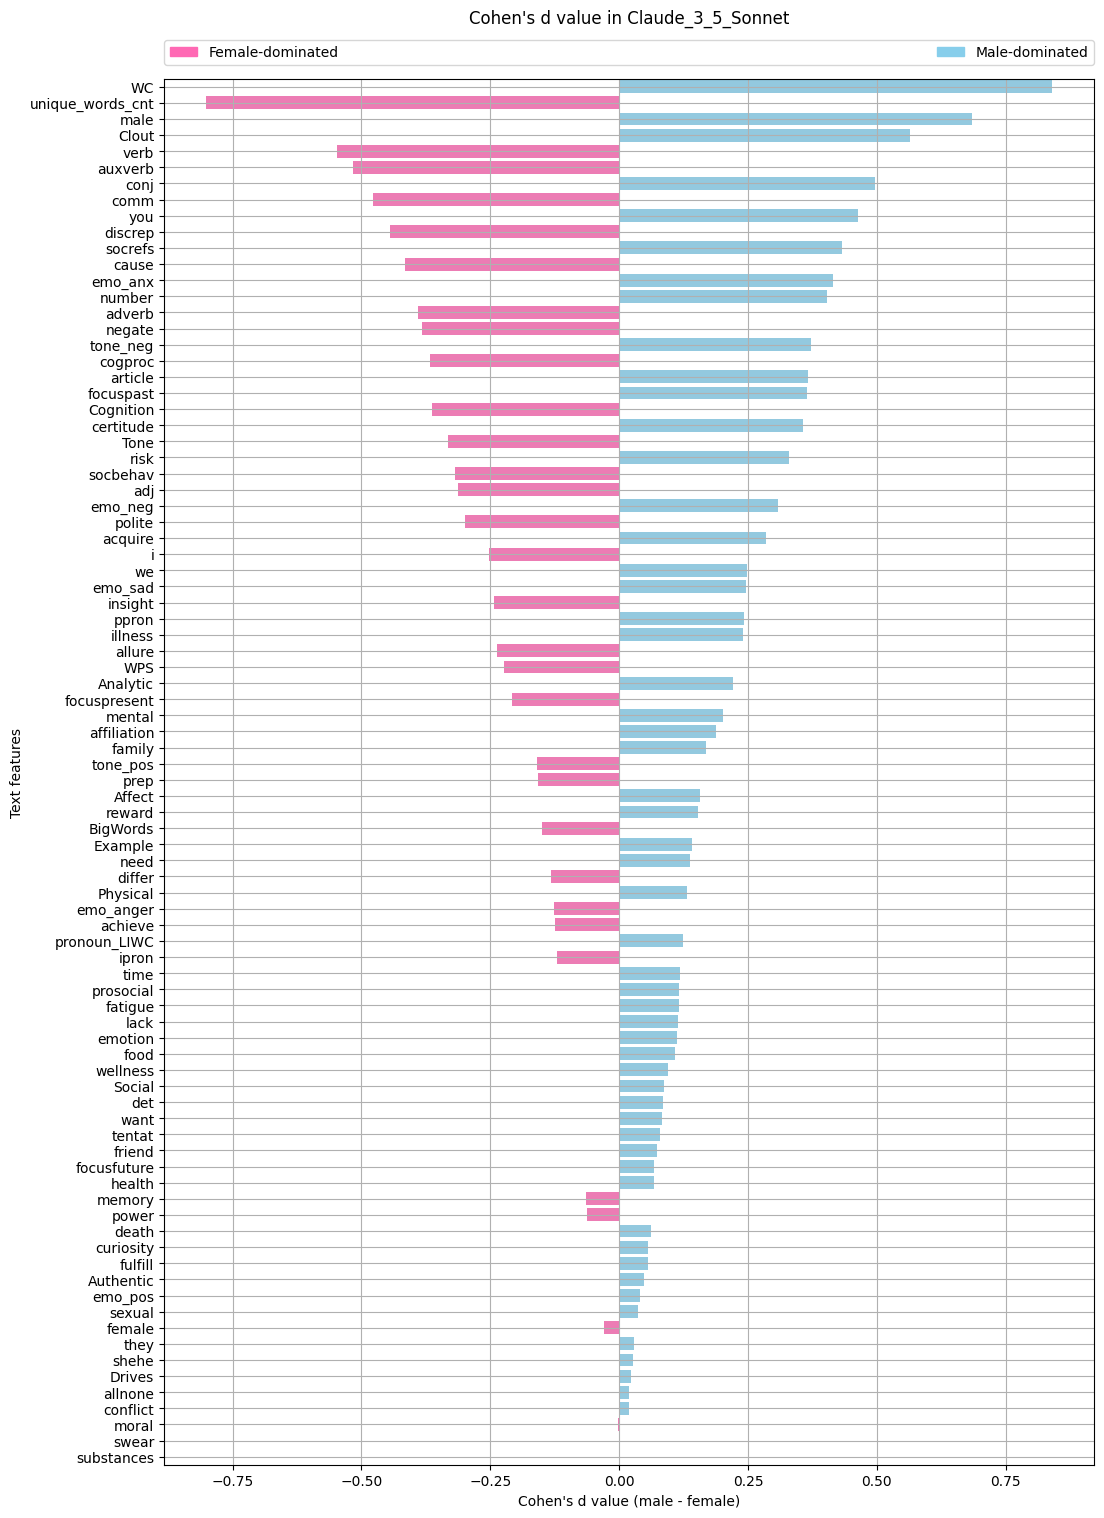

In [9]:
# Compute cohen's ds
sorted_cohens_ds = get_sorted_cohens_d(male_df, female_df, text_feature_cols, MODEL_NAME)

plot_cohens_d_features(sorted_cohens_ds, MODEL_NAME)